In [24]:
import os
import sys
#from keras.applications.inception_resnet_v2 import InceptionResNetV2
from time import time
from keras.applications.xception import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from scipy.io import loadmat
from PIL import Image
from scipy.ndimage.interpolation import rotate
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# load json and create model
json_file = open('../models/rotation_regressor.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("../models/rotation_regressor.h5")

In [23]:
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

def show(x):
    imgplot = plt.imshow(x)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()


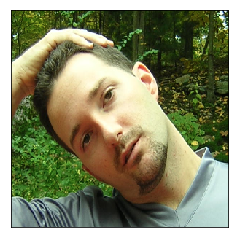

angle=66.06644439697266


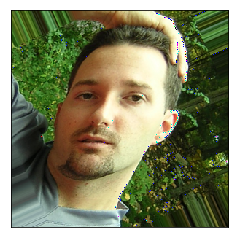

In [33]:
img = load_img('test.png', target_size=(299, 299))
x = img_to_array(img)
show(np.array(x, dtype='uint8'))

angle = model.predict(preprocess_input(np.array([x])))
print("angle={}".format(angle[0][0]))
x = rotate(x, -1 * angle, mode='nearest', reshape=False)
show(np.array(x, dtype='uint8'))

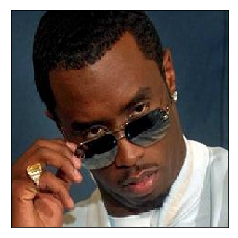

angle=94.21659851074219


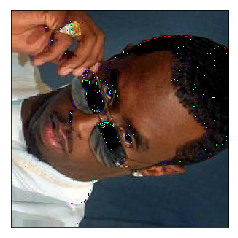

In [28]:
img = load_img('pdiddy.png', target_size=(299, 299))
x = img_to_array(img)
show(np.array(x, dtype='uint8'))

angle = model.predict(preprocess_input(np.array([x])))
print("angle={}".format(angle[0][0]))
x = rotate(x, -1 * angle, mode='nearest', reshape=False)
show(np.array(x, dtype='uint8'))

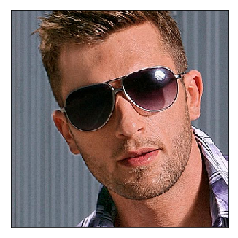

angle=56.07526779174805


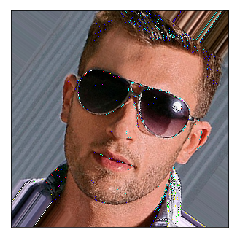

In [31]:
img = load_img('test2.png', target_size=(299, 299))
x = img_to_array(img)
show(np.array(x, dtype='uint8'))

angle = model.predict(preprocess_input(np.array([x])))
print("angle={}".format(angle[0][0]))
x = rotate(x, -1 * angle + 20, mode='nearest', reshape=False)
show(np.array(x, dtype='uint8'))